In [1]:
# ======== importing modules ========
from pytransit import MandelAgol
import glob, os
from os import listdir
from os.path import isfile, join
import fnmatch
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import numpy as np
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=np.nan)
import pandas as pd

fs = 22; ms = 4 #fontsize, markersize

#========== Karen's inverse weighted binning function =======
def Bin_func(time,flux,error,binsize):
    good = np.where(np.isfinite(time)) # finding where values are finite and "Not a Number (NaN)" or +/- infinite (inf)
    timefit = time[good] 
    fluxfit = flux[good] #using indices where values are finite, find where times, flux and errors are also finite
    errfit  = error[good]
    timemax = np.max(timefit) #find max time (or last time measurement)
    timemin = np.min(timefit) #find min time (or first time measurement)
    npoints = len(timefit)    #find number of data points
    nbins   = int(math.ceil((timemax - timemin)/binsize)) #binsize in days to nearest interger
    bintime = np.full((nbins,), np.nan) 
    binflux = np.full((nbins,), np.nan) #creating an empty array full of NaNs to fill in below
    binerr  = np.full((nbins,), np.nan)
    for i in range(0,nbins-1):
        tobin = [np.where( (timefit >= (timemin + i*binsize)) & (timefit < (timemin + (i+1)*binsize)) )] #with given binsize, searching over smaller areas (aka windows) (t-window) to (t+window)
        if tobin[0] != -1:
    #     inverse variance weighted means; read about here: https://en.wikipedia.org/wiki/Inverse-variance_weighting
    
            binflux[i] = ((fluxfit[tobin]/(errfit[tobin]**2.0)).sum()) / ((1.0/errfit[tobin]**2.0).sum())
            bintime[i] = ((timefit[tobin]/(errfit[tobin]**2.0)).sum()) / ((1.0/errfit[tobin]**2.0).sum())
            binerr[i]  = 1.0 / (np.sqrt( (1.0/errfit[tobin]**2.0)).sum() )
    
    good2   = np.where(np.isfinite(bintime)) #checking again for NaNs and infs that might be created by previous step
    bintime = bintime[good2]
    binflux = binflux[good2] 
    binerr  = binerr[good2]
    
    return bintime, binflux, binerr #here you have binned data with averaged values based on the bin sizes you've selected

In [2]:
#------------------------------Finding Downloaded TESS Data Files --------------------------------------
path = '/Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean' #location of where I put downloaded files

data = [os.path.join(dirpath, f) # an array of path names to be looped over
    for dirpath, dirnames, files in os.walk(path) #recursively searches through directory
    for f in fnmatch.filter(files, '*.lc')] #finds every file (*) that ends with .lc

print "number of files: ",len(data) #number of files

number of files:  10138


In [3]:
print data[0][59:-3]

114888924_sector01_1_1


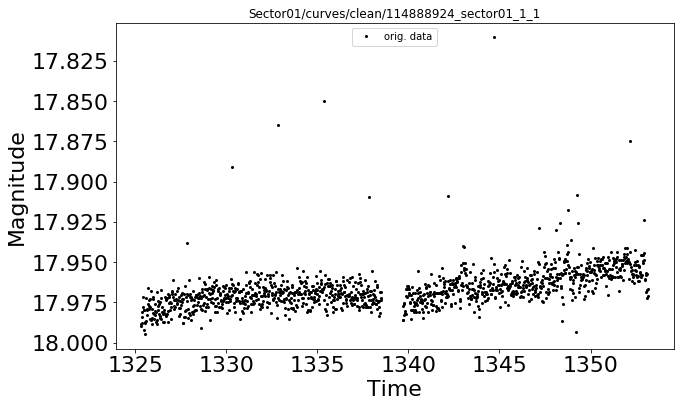

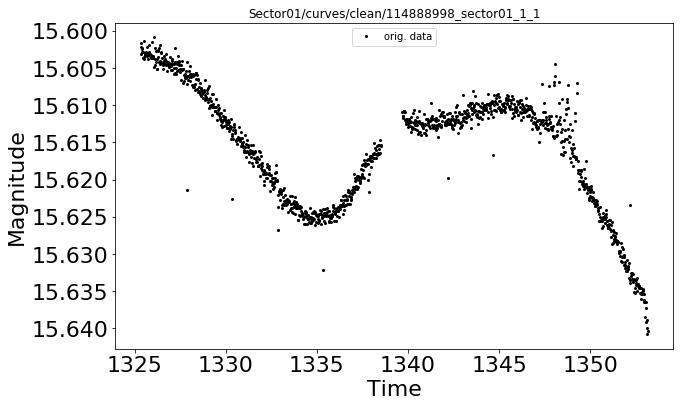

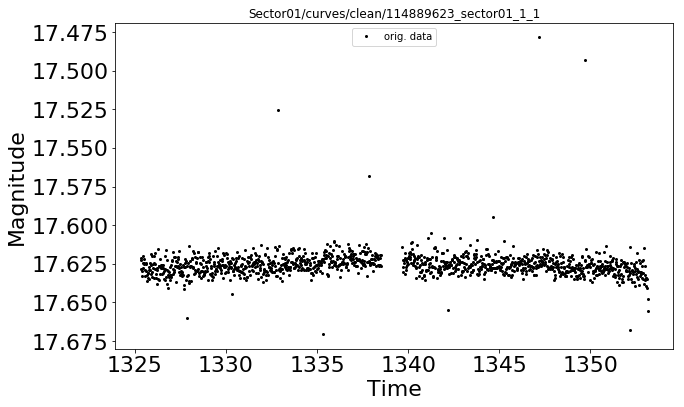

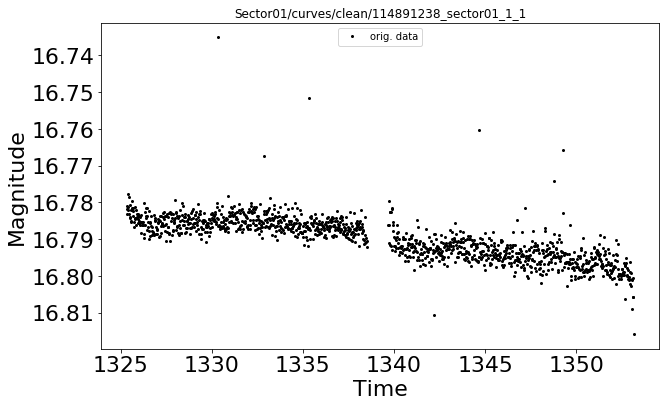

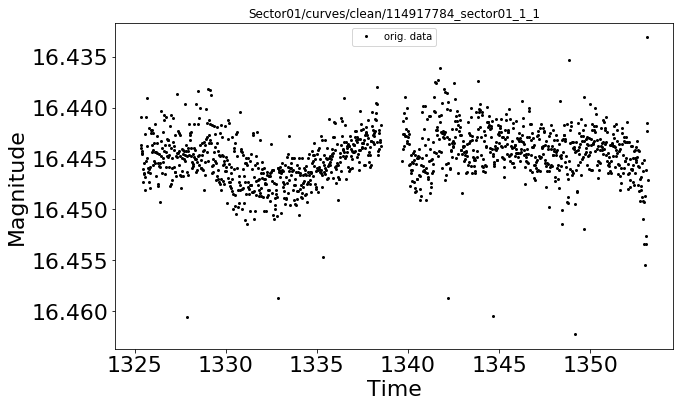

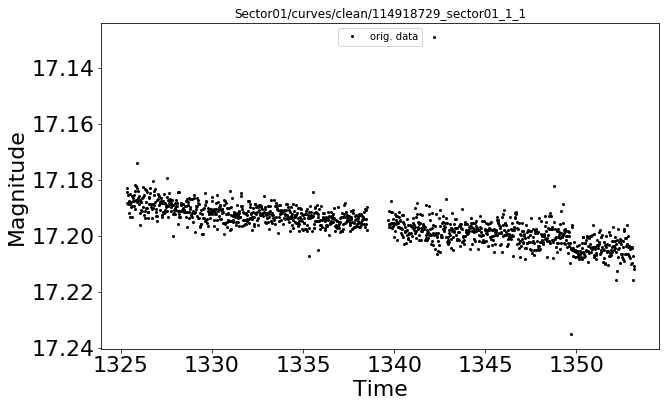

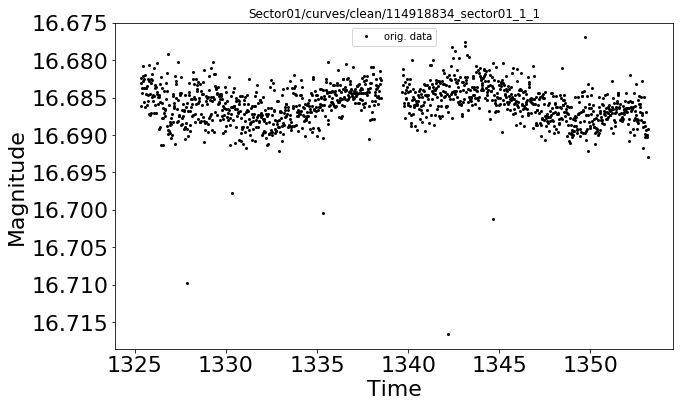

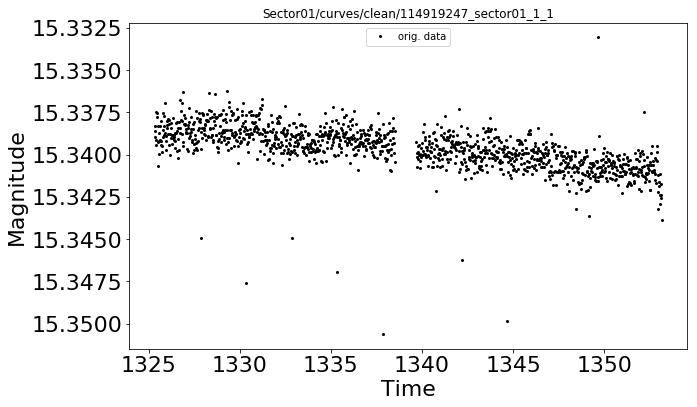

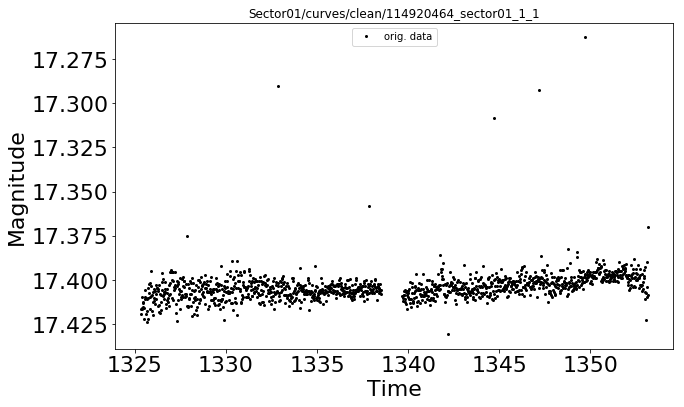

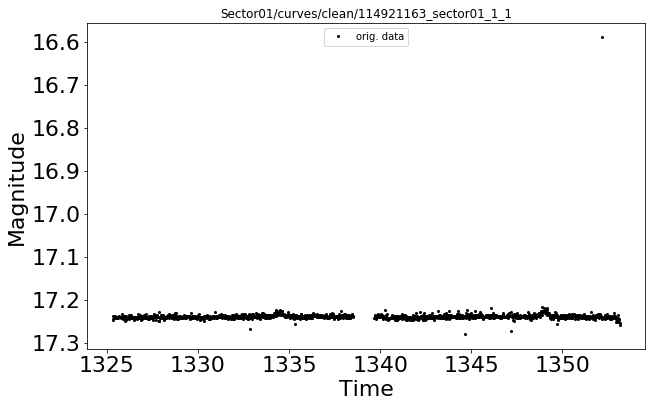

In [4]:
# for d in range(len(data)): #creating a for loop to show light curve figures for all files
for d in range(10): #creating a for loop to show light curve figures for only 10 files
    time     = np.transpose(np.loadtxt(data[d]))[0] #first  (zero indexing in python) column 
    mag      = np.transpose(np.loadtxt(data[d]))[1] #second (zero indexing in python) column 
    magerror = np.transpose(np.loadtxt(data[d]))[2] #third (zero indexing in python) column 
    
    plt.figure(figsize=(10,6)) #creating figure
    plt.plot(time,mag,color='black', marker='.',linestyle='none',markersize=ms,label="orig. data") #each data point is a dot, and are not connected by lines
    plt.gca().invert_yaxis()  # remember magnitude is inverted (brightest is more negative, faintest is more positive)
    plt.title(str(data[d][37:-3])) #str = string, the [37:-3] removes the pathname before the filename and the .lc at the end
    plt.xlabel("Time",fontsize=fs)
    plt.ylabel("Magnitude",fontsize=fs)
    plt.xticks(fontsize=fs) #making tick labels bigger than default
    plt.yticks(fontsize=fs)
    plt.legend(loc='upper center')
    plt.show() #shows figure
    print "" #adds space between figures

Let's trying running a rolling mean to get a better idea of what is going on without outliers


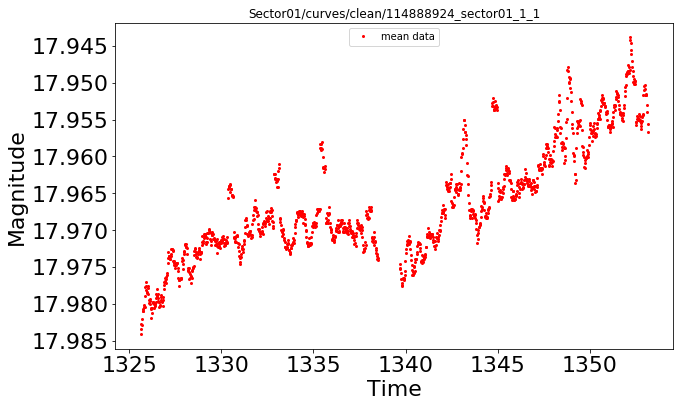

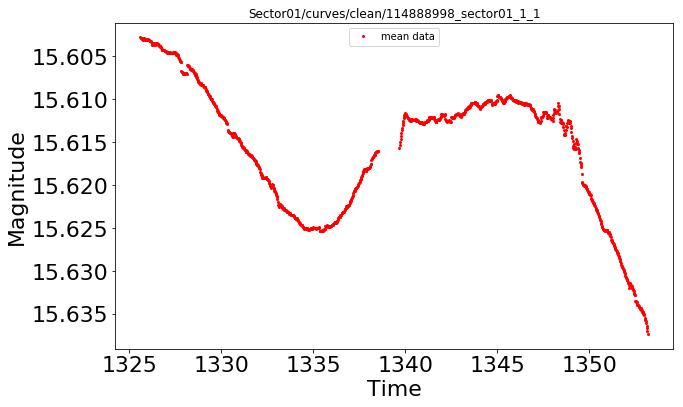

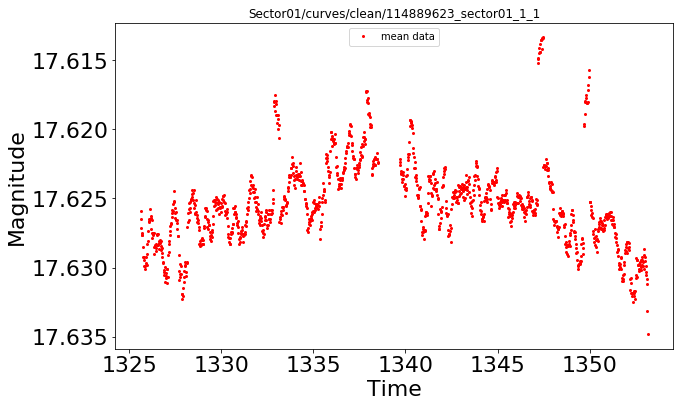

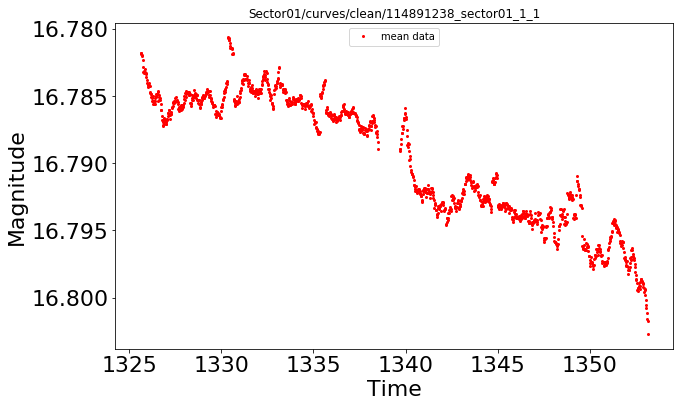

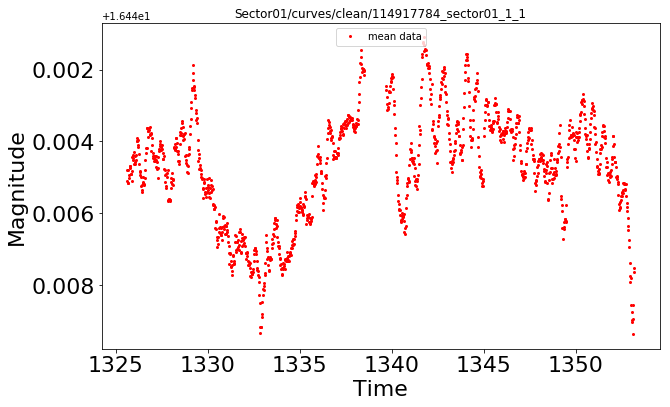

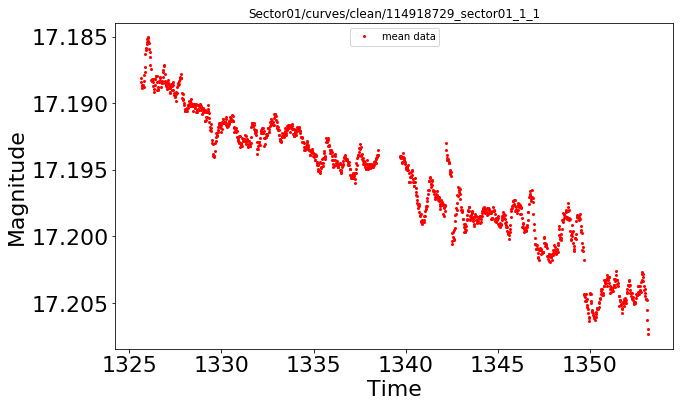

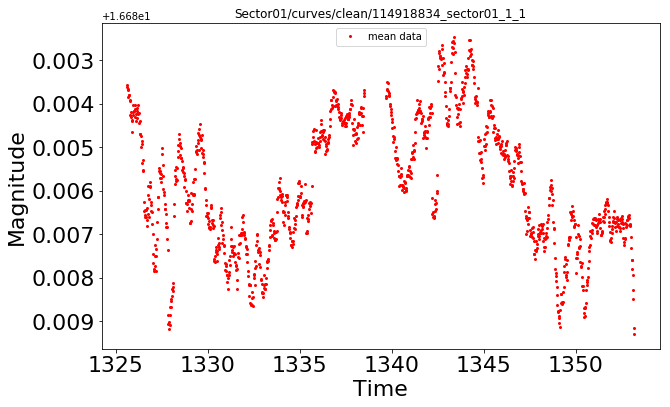

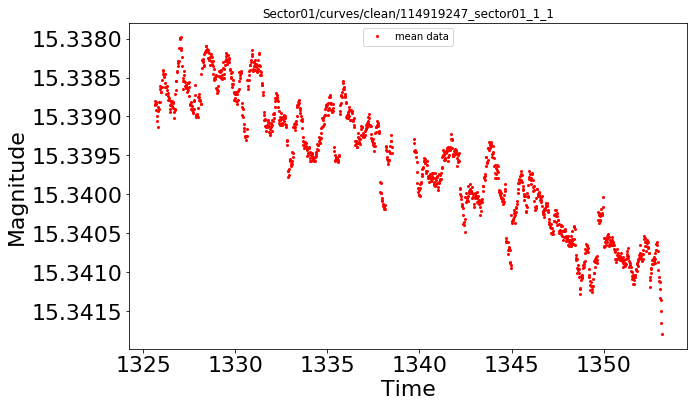

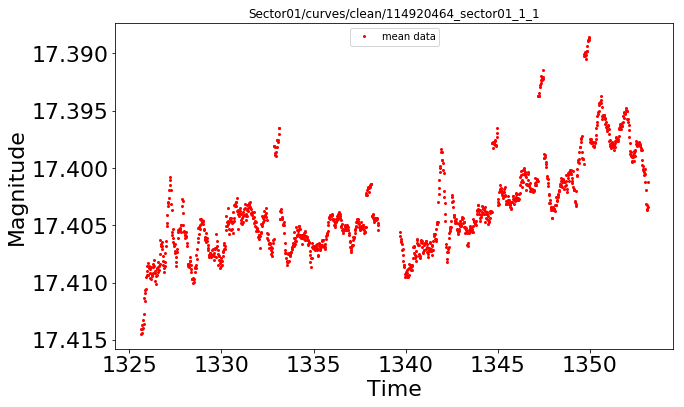

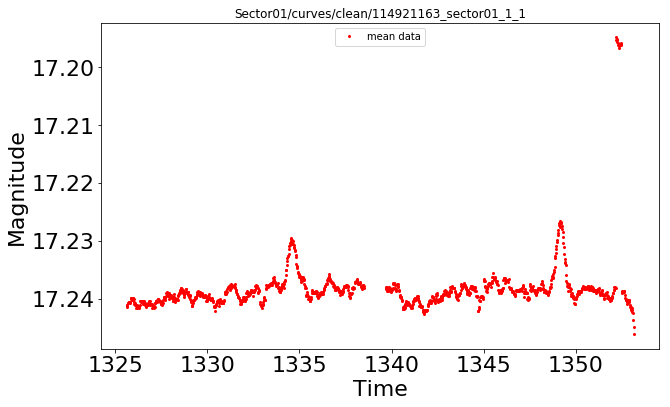

In [6]:
print "Let's trying running a rolling mean to get a better idea of what is going on without outliers"
# https://en.wikipedia.org/wiki/Moving_average

# for d in range(len(data)): #creating a for loop to show light curve figures for all files
for d in range(10): 
    time     = np.transpose(np.loadtxt(data[d]))[0] #first  (zero indexing in python) column 
    mag      = np.transpose(np.loadtxt(data[d]))[1] #second (zero indexing in python) column 
    magerror = np.transpose(np.loadtxt(data[d]))[2] #third (zero indexing in python) column 
    
    mag_mean = np.array(pd.DataFrame(mag).rolling(15).mean()) #allows 15 data points in moving window
    
    plt.figure(figsize=(10,6)) #creating figure
#     plt.plot(time,mag,color='black', marker='.',linestyle='none',markersize=ms,label="orig. data") #each data point is a dot, and are not connected by lines
    plt.plot(time,mag_mean,color='red',marker='.',linestyle='none',markersize=ms,label="mean data") 
    plt.gca().invert_yaxis()  # remember magnitude is inverted (brightest is more negative, faintest is more positive)
    plt.title(str(data[d][37:-3])) #str = string, the [37:-3] removes the pathname before the filename and the .lc at the end
    plt.xlabel("Time",fontsize=fs)
    plt.ylabel("Magnitude",fontsize=fs)
    plt.xticks(fontsize=fs) #making tick labels bigger than default
    plt.yticks(fontsize=fs)
    plt.legend(loc='upper center')    
    plt.show() #shows figure
    print "" #adds space between figures

